# 🟣 ➡️ 🟡 ➡️ 🟠  <span style="color:#6f5b85;">  Point defect diffusion in a metal (Part 2) <span>



## <span style="color:#957bb1;"> Vacancy diffusion in Ni <span>

### 1) Build the system with vacancy

After investigating hydrogen diffusion in the crystal lattice, we now turn our attention to another type of point defect: **the vacancy**. Unlike hydrogen, which diffuses as a mobile interstitial atom, **a vacancy diffuses through successive atomic jumps**, where neighboring atoms move to occupy the vacant site. This process, known as **vacancy diffusion**, creates the effect of the vacancy moving through the lattice.

In a face-centered cubic (FCC) structure, each atom has **12 nearest neighbors**, providing multiple possible paths for atomic exchange. Studying these atomic movements helps us better understand diffusion mechanisms and their impact on defect migration and plastic deformation in metallic materials.

The possible jump vectors for vacancy diffusion in an FCC lattice correspond to the directions between an atom and its 12 first nearest neighbors. These vectors are of the form:

$$
\vec{v} = \frac{a}{2} \cdot (\pm1, \pm1, 0), \quad (\pm1, 0, \pm1), \quad (0, \pm1, \pm1)
$$

where $a$ is the lattice constant. Each of these vectors connects the center of an FCC unit cell to one of its 12 face-centered neighbor sites. Understanding these jump directions is essential for modeling vacancy mobility and calculating diffusion coefficients in FCC crystals.



In [12]:
from ase.calculators.lammpsrun import LAMMPS
import os
from ase.optimize import BFGS
import numpy as np
from ase.build import bulk

# Set the path to the LAMMPS executable
os.environ["ASE_LAMMPSRUN_COMMAND"] = "lammps_ase/build/lmp"
os.environ["LD_LIBRARY_PATH"] = "lammps_ase/build:" + os.environ.get("LD_LIBRARY_PATH", "")

# assign the potential to the system build in LAMMPS
parameters = {'pair_style': 'eam/alloy', 'pair_coeff': ['* * Potential/NiAlH_jea.eam.alloy Ni'] }
files = ['Potential/NiAlH_jea.eam.alloy']  
lammps = LAMMPS(files=files, **parameters)



# Cell without defects

unit_cell = bulk('Ni', crystalstructure='fcc', a=3.52, cubic=True)
bulk = unit_cell.repeat((4, 4, 4))

a = 3.52

# Cell with a vacancy
vac_init = bulk.copy()
vac_init.pop(255)
vac_init.calc = lammps

vac_fin = bulk.copy()
vac_fin.pop(254)
vac_fin.calc = lammps



### <span style="color:#60a976;"> To do: Minimize the cells and visualized it. <span>

In [13]:
import nglview as nv
print('\n Energy minimisation for cell with hydrogen in tetrahedric site')
opt = BFGS(vac_init)  
opt.run(fmax=0.001) 


view = nv.show_ase(vac_init)
view.add_unitcell()
view.background = 'white'
view.camera = 'orthographic'
view


 Energy minimisation for cell with hydrogen in tetrahedric site
      Step     Time          Energy          fmax
BFGS:    0 17:14:08    -1133.058000        0.397014
BFGS:    1 17:14:08    -1133.084917        0.330914
BFGS:    2 17:14:08    -1133.144556        0.083788
BFGS:    3 17:14:08    -1133.147213        0.073487
BFGS:    4 17:14:08    -1133.154947        0.019695
BFGS:    5 17:14:08    -1133.155391        0.018133
BFGS:    6 17:14:08    -1133.156895        0.008412
BFGS:    7 17:14:08    -1133.157008        0.008385
BFGS:    8 17:14:09    -1133.157183        0.006319
BFGS:    9 17:14:09    -1133.157271        0.005072
BFGS:   10 17:14:09    -1133.157322        0.005124
BFGS:   11 17:14:09    -1133.157345        0.003956
BFGS:   12 17:14:09    -1133.157367        0.002204
BFGS:   13 17:14:09    -1133.157379        0.001916
BFGS:   14 17:14:09    -1133.157384        0.001296
BFGS:   15 17:14:09    -1133.157386        0.001002
BFGS:   16 17:14:09    -1133.157387        0.000702


NGLWidget()

In [14]:
print('\n Energy minimisation for cell with hydrogen in octahedric site')
opt = BFGS(vac_fin)  
opt.run(fmax=0.0001) 

view = nv.show_ase(vac_fin)
view.add_unitcell()
view.background = 'white'
view.camera = 'orthographic'
view


 Energy minimisation for cell with hydrogen in octahedric site
      Step     Time          Energy          fmax
BFGS:    0 17:14:14    -1133.058000        0.397014
BFGS:    1 17:14:14    -1133.084917        0.330914
BFGS:    2 17:14:14    -1133.144556        0.083788
BFGS:    3 17:14:14    -1133.147213        0.073487
BFGS:    4 17:14:14    -1133.154947        0.019695
BFGS:    5 17:14:14    -1133.155391        0.018133
BFGS:    6 17:14:14    -1133.156895        0.008412
BFGS:    7 17:14:14    -1133.157008        0.008385
BFGS:    8 17:14:14    -1133.157183        0.006319
BFGS:    9 17:14:14    -1133.157271        0.005072
BFGS:   10 17:14:14    -1133.157322        0.005124
BFGS:   11 17:14:15    -1133.157345        0.003956
BFGS:   12 17:14:15    -1133.157367        0.002204
BFGS:   13 17:14:15    -1133.157379        0.001916
BFGS:   14 17:14:15    -1133.157384        0.001296
BFGS:   15 17:14:15    -1133.157386        0.001002
BFGS:   16 17:14:15    -1133.157387        0.000702
BF

NGLWidget()

### 2) Compute energy barrier 


### <span style="color:#60a976;"> To do: NEB calculations with ASE for the vacancy. <span>

In [17]:
from ase.mep import NEB  
import nglview as nv
from ase import Atom
from ase.io import read
from ase.mep import NEBTools

# Nombre total d’images (initiale + intermédiaires + finale)
n_images = 9

# Créer la liste des images (copies ASE)
images = [vac_init.copy()]  # image initiale
for _ in range(n_images - 2):
    images.append(vac_init.copy())  # images intermédiaires
images.append(vac_fin.copy())  # image finale

# Interpolation linéaire entre les images (ou utilisez method='idpp' pour + réaliste)
neb = NEB(images)
neb.interpolate()
for image in images:
    image.calc = LAMMPS(files=files, **parameters)
    
opt = BFGS(neb)  # pour suivre la convergence si besoin
opt.run(fmax=0.005)


      Step     Time          Energy          fmax
BFGS:    0 17:19:11    -1131.501132        2.167528
BFGS:    1 17:19:18    -1131.749656        1.647494
BFGS:    2 17:19:26    -1132.146189        0.377034
BFGS:    3 17:19:35    -1132.170346        0.327601
BFGS:    4 17:19:42    -1132.235379        0.159385
BFGS:    5 17:19:50    -1132.243325        0.122904
BFGS:    6 17:19:58    -1132.252778        0.135164
BFGS:    7 17:20:06    -1132.260707        0.142171
BFGS:    8 17:20:14    -1132.268183        0.076305
BFGS:    9 17:20:22    -1132.271022        0.061111
BFGS:   10 17:20:31    -1132.273480        0.078641
BFGS:   11 17:20:53    -1132.276962        0.099703
BFGS:   12 17:21:17    -1132.280297        0.064655
BFGS:   13 17:21:50    -1132.281832        0.039776
BFGS:   14 17:22:18    -1132.282868        0.058970
BFGS:   15 17:22:54    -1132.284480        0.077683
BFGS:   16 17:23:19    -1132.286214        0.053049
BFGS:   17 17:23:43    -1132.287003        0.029450
BFGS:   18 17:

True

### <span style="color:#60a976;"> To do: Visualize the NEB results.  <span>

### <span style="color:#e83f3f;"> Carefull: the results must not depend on the cell size. <span>

    

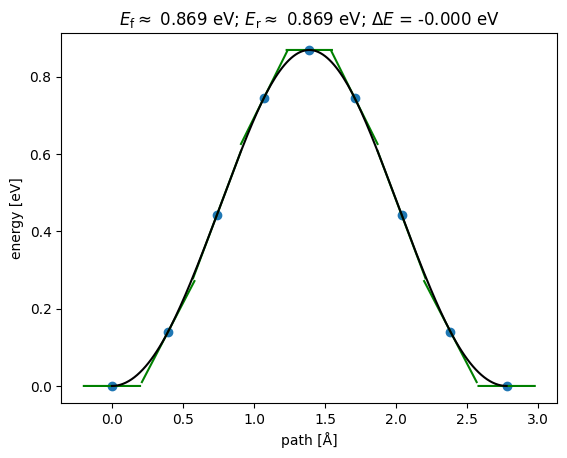

In [19]:
nebtools = NEBTools(images)
Ef, dE = nebtools.get_barrier(fit=False)

max_force = nebtools.get_fmax()
fig = nebtools.plot_band()

### <span style="color:#60a976;"> To do: Visualize NEB results for the atomic configuration of each image. <span>

In [20]:
import ipywidgets as widgets
from IPython.display import display, clear_output

output = widgets.Output()

def create_viewer(index):
    view = nv.show_ase(images[index])
    view.add_representation('ball+stick')
    view.center()
    return view

slider = widgets.IntSlider(min=0, max=n_images - 1, step=1, description='Image')

def on_slider_change(change):
    with output:
        clear_output(wait=True)
        view = create_viewer(change['new'])
        display(view)

slider.observe(on_slider_change, names='value')

with output:
    display(create_viewer(0))

display(slider, output)


IntSlider(value=0, description='Image', max=8)

Output()

### 3) Kinetic Monte Carlo simulations 



The jump frequency is typically modeled using an Arrhenius-type expression, which depends exponentially on the migration energy barrier $E_a$ and the temperature $T$:

$$
\Gamma = \nu \, e^{-\frac{E_a}{k_B T}}
$$

where $\nu$ is an attempt frequency and $k_B$ is the Boltzmann constant.



In [23]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Constants
kB = 8.617e-5  # eV/K - Boltzmann constant
nu0 = 1e13     # Hz - Attempt frequency (typical for solids)

# Widgets: temperature (slider) and energy barrier (text input)
temp_slider = widgets.FloatSlider(
    value=300, min=50, max=1500, step=10,
    description='Temperature (K):', continuous_update=False
)

Ea_input = widgets.FloatText(
    value=0.87,
    description='Barrier (eV):',
    step=0.01
)

# Output area
output = widgets.Output()

# Update function
def update(T, Ea):
    with output:
        output.clear_output(wait=True)
        
        jump_frequency = nu0 * np.exp(-Ea / (kB * T))
        time_between_jumps = 1 / jump_frequency
        
        print(f"Temperature: {T:.1f} K")
        print(f"Energy barrier: {Ea:.3f} eV")
        print(f"Jump frequency: {jump_frequency:.2e} Hz")
        print(f"Mean time between jumps: {time_between_jumps * 1e9:.2f} ns")
        
        # Plot frequency vs temperature
        Ts = np.linspace(50, 1500, 300)
        freqs = nu0 * np.exp(-Ea / (kB * Ts))
        
        plt.figure(figsize=(6, 4))
        plt.plot(Ts, freqs, label="Jump frequency")
        plt.axvline(T, color='red', linestyle='--', label="Selected temperature")
        plt.yscale('log')
        plt.xlabel("T (K)")
        plt.ylabel("Jump frequency (Hz)")
        plt.title("Temperature dependence of jump frequency")
        plt.legend()
        plt.grid(True)
        plt.show()

# Interactivity
ui = widgets.VBox([Ea_input, temp_slider])
widgets.interactive_output(update, {'T': temp_slider, 'Ea': Ea_input})
display(ui, output)


Output()

### <span style="color:#60a976;"> To do: Is it not possible to capture vacancy diffusion in MD, alternative: KMC <span>



The Kinetic Monte Carlo method (KMC) is a stochastic algorithm used to simulate the **time evolution** of systems with **discrete and rare events**, such as atomic diffusion or defect migration.

For each KMC step:
 1. Generate a list of **possible events** (e.g., atomic jumps, vacancy hops).
 2. Each event $i$ has a **rate**:
    $$\gamma_i = \nu_i \times exp(-E_i / (k_B T))$$

    where:
    - $\nu_i$: attempt frequency (e.g., $10^{12}$ Hz)
    - $E_i$: energy barrier
    - $k_B$: Boltzmann constant
    - $T$: temperature in Kelvin
      
 3. Compute the **total rate**:
    $$\Gamma = \sum_i^{N} \gamma_i$$
    
Note that $\Gamma_k$ will be $\Gamma_k = \sum_i^{k} \gamma_i$
 
 5. Generate two random numbers $r_1$ and $r_2$ ∈ [0, 1]:
    - Time increment:
      $$ \Delta t = -ln(r_1) / \Gamma$$
    - Choose event $j$ such that:
        $$\Gamma_{k-1} < r_2 \Gamma < \Gamma_k$$
       where $k$ is the $k^{th}$ event

 6. Perform event $j$, update system and time.

 📌 Key Difference Between Molecular Dynamics (MD) and Kinetic Monte Carlo (KMC)

 1) Molecular Dynamics (MD)
   - Solves **Newton's equations of motion** at each femtosecond-scale timestep.
   - Time advances in **regular, fixed increments** (e.g., 1 or 2 fs).
   - Atoms evolve continuously according to forces, even if **no rare event** occurs.
   - Suitable for fast dynamics, but inefficient for rare-event processes (e.g., diffusion over high barriers).

 2) 🎲 Kinetic Monte Carlo (KMC)
   - Instead of computing all atom trajectories, it focuses only on **rare events** (e.g., atomic jumps, defect motion).
   - **Each KMC step corresponds to one physical event** (e.g., a vacancy jump).
   - The **time increment $\Delta$t is computed stochastically** based on the rates of possible events.
   - Efficient for long timescale evolution: one can simulate **seconds or longer** with relatively few steps.


In [2]:
import numpy as np
import random

# --- Constants ---
k_B = 8.617e-5  # eV/K
T = 800         # Temperature
E_m = 0.87      # Migration barrier (eV)

# --- Simulation parameters ---
L = 10  # Number of FCC unit cells per dimension
n_vacancies = 5
max_steps = 1000
output_xyz = "trajectory.xyz"
alat = 3.52  # Nickel lattice parameter in Angstroms
nu = 1e13

# --- Box size for PBC ---
box_size = np.array([L * alat, L * alat, L * alat])

# --- FCC basis vectors within a unit cell ---
fcc_basis = [
    (0, 0, 0),
    (0.5, 0.5, 0),
    (0.5, 0, 0.5),
    (0, 0.5, 0.5)
]

# --- Build the FCC lattice (positions in Angstroms) ---
fcc_sites = []
fcc_cell_indices = []  # liste des tuples (i,j,k,base_idx)
index = 0
for i in range(L):
    for j in range(L):
        for k in range(L):
            for base_idx, (dx, dy, dz) in enumerate(fcc_basis):
                x = (i + dx) * alat
                y = (j + dy) * alat
                z = (k + dz) * alat
                pos = (x, y, z)
                fcc_sites.append(pos)
                fcc_cell_indices.append((i, j, k, base_idx))
                index += 1
                
n_sites = len(fcc_sites)
fcc_array = np.array(fcc_sites)
lattice = ['Ni'] * n_sites
vacancy_indices = []

# --- Create lookup dict from (cell_i, cell_j, cell_k, base_idx) to site index ---
site_map = {}
for idx, (ci, cj, ck, bi) in enumerate(fcc_cell_indices):
    site_map[(ci % L, cj % L, ck % L, bi)] = idx
    
# --- Place initial vacancies at FCC sites ---
for _ in range(n_vacancies):
    while True:
        idx = random.randint(0, n_sites - 1)
        if lattice[idx] != 'V':
            lattice[idx] = 'V'
            vacancy_indices.append(idx)
            break

# --- Minimum image distance function with PBC ---
def minimum_image_distance(pos1, pos2, box):
    delta = pos2 - pos1
    delta -= box * np.round(delta / box)
    return np.linalg.norm(delta)

def find_neighbors(index):
    neighbors = []
    ci, cj, ck, bi = fcc_cell_indices[index]
    # Les 12 premiers voisins dans FCC correspondent aux bases dans cellules voisines
    # Voisins FCC = décalages cellulaires proches + bases FCC voisines (standard)

    # Liste des 12 voisins (en indices cellulaires + base)
    # Ces offsets doivent être déterminés précisément pour FCC.
    # Voici la liste standard des 12 premiers voisins FCC par base.

    # Pré-calcul des vecteurs des 12 premiers voisins (cellule + base)
    # On définit cette table à la main (voir remarque après)
    neighbor_shifts = [
        (0, 0, 0, 1),
        (0, 0, 0, 2),
        (0, 0, 0, 3),
        (-1, 0, 0, 3),
        (1, 0, 0, 2),
        (0, -1, 0, 2),
        (0, 1, 0, 3),
        (0, 0, -1, 1),
        (0, 0, 1, 2),
        (-1, 0, 1, 0),
        (1, 0, -1, 0),
        (0, -1, 1, 0)
    ]

    for dci, dcj, dck, dbi in neighbor_shifts:
        nci = (ci + dci) % L
        ncj = (cj + dcj) % L
        nck = (ck + dck) % L
        nbi = dbi
        neighbor_idx = site_map.get((nci, ncj, nck, nbi))
        if neighbor_idx is not None:
            neighbors.append(neighbor_idx)
    return neighbors


# --- Interaction energy function depending on distance ---
def interaction_energy(distance, C=5.0, r_min=1.0):
    if distance < r_min:
        distance = r_min
    return C / distance**3

# --- XYZ Writer ---
def write_xyz(filename, lattice, fcc_array, time, step):
    with open(filename, 'a') as f:
        f.write(f"{len(lattice)}\n")
        f.write(f"Step {step}, Time {time:.5e} ps\n")
        for i, element in enumerate(lattice):
            x, y, z = fcc_array[i]
            f.write(f"{element} {x:.4f} {y:.4f} {z:.4f}\n")

# --- Main KMC loop ---
t = 0.0
trajectory = []
open(output_xyz, 'w').close()  # Clear output file

for step in range(max_steps):
    event_list = []
    total_rate = 0.0

    for i, v_idx in enumerate(vacancy_indices):
        neighbors = find_neighbors(v_idx)
        for n_idx in neighbors:
            if lattice[n_idx] == 'Ni':
                # Compute energy barrier with interaction
                E = E_m
                if len(vacancy_indices) > 1:
                    for other_idx in vacancy_indices:
                        if other_idx != v_idx:
                            dist = minimum_image_distance(fcc_array[n_idx], fcc_array[other_idx], box_size)
                            E += interaction_energy(dist)
                rate = nu*np.exp(-E / (k_B * T))
                event_list.append((rate, i, v_idx, n_idx))
                total_rate += rate

    if total_rate == 0:
        print("No more valid events.")
        break

    # Time increment
    u2 = random.random()
    dt = -np.log(1 - u2) / total_rate
    t += dt

    # Event selection
    u1 = random.random() * total_rate
    cumulative = 0.0
    for rate, vac_i, from_idx, to_idx in event_list:
        cumulative += rate
        if cumulative > u1:
            # Perform the jump
            lattice[from_idx] = 'Ni'
            lattice[to_idx] = 'V'
            vacancy_indices[vac_i] = to_idx
            trajectory.append((t, from_idx, to_idx))
            break

    write_xyz(output_xyz, lattice, fcc_array, t, step)
    # Save XYZ snapshot every x steps
    if step % 50 == 0:
        print(f"Step {step}, Time = {t:.4e} ps, Vacancies positions: {[fcc_array[i] for i in vacancy_indices]}")

print("Fin")


Step 0, Time = 1.0973e-09 ps, Vacancies positions: [array([12.32, 29.92,  0.  ]), array([33.44, 12.32,  3.52]), array([28.16, 26.4 ,  1.76]), array([21.12, 19.36, 26.4 ]), array([26.4 , 28.16,  5.28])]
Step 50, Time = 4.2898e-08 ps, Vacancies positions: [array([8.8, 8.8, 0. ]), array([33.44,  5.28,  7.04]), array([26.4 , 22.88,  7.04]), array([14.08, 15.84, 33.44]), array([21.12, 26.4 ,  5.28])]
Step 100, Time = 7.0628e-08 ps, Vacancies positions: [array([ 5.28,  3.52, 12.32]), array([29.92,  7.04, 15.84]), array([14.08, 17.6 , 21.12]), array([19.36, 14.08,  1.76]), array([29.92, 14.08, 12.32])]
Step 150, Time = 1.0030e-07 ps, Vacancies positions: [array([5.28, 5.28, 7.04]), array([24.64, 28.16, 21.12]), array([ 5.28, 24.64, 26.4 ]), array([19.36, 12.32, 31.68]), array([28.16,  3.52, 10.56])]
Step 200, Time = 1.2029e-07 ps, Vacancies positions: [array([10.56, 33.44, 15.84]), array([17.6 , 26.4 , 22.88]), array([ 3.52, 12.32, 33.44]), array([14.08,  7.04,  0.  ]), array([ 1.76, 33.44,  

In [12]:
from ase.io import write, read, Trajectory
import nglview as nv
import ipywidgets as widgets
from IPython.display import display, clear_output

images = read('trajectory.xyz', index=':')
n_images = len(images)

output = widgets.Output()

def create_viewer(index):
    view = nv.show_ase(images[index])
    view.clear_representations()
    view.add_ball_and_stick()
    view.center()
    return view

slider = widgets.IntSlider(min=0, max=n_images - 1, step=1, description='Frame')

def on_slider_change(change):
    with output:
        clear_output(wait=True)
        view = create_viewer(change['new'])
        display(view)

slider.observe(on_slider_change, names='value')

with output:
    display(create_viewer(0))

display(slider, output)

view  


IntSlider(value=0, description='Frame', max=999)

Output()

<function ase.visualize.view(atoms, data=None, viewer='ase', repeat=None, block=False, **kwargs)>

In [13]:
from ase.io import read
import nglview as nv
import ipywidgets as widgets
from IPython.display import display, clear_output
from ase import Atoms

# Chargement de la trajectoire
images = read('trajectory.xyz', index=':')
n_images = len(images)

# Créer une liste avec uniquement les lacunes à chaque frame
def extract_vacancies(atoms):
    positions = atoms.get_positions()
    symbols = atoms.get_chemical_symbols()
    
    vacancy_positions = [pos for sym, pos in zip(symbols, positions) if sym == 'V']
    if not vacancy_positions:
        return Atoms()  # aucun atome si pas de vacance

    # Utilise 'He' pour que nglview puisse les afficher (V n'est pas reconnu)
    vacancy_atoms = Atoms('He' * len(vacancy_positions), positions=vacancy_positions, cell=atoms.cell, pbc=True)
    return vacancy_atoms

vacancy_frames = [extract_vacancies(frame) for frame in images]

# Interface interactive
output = widgets.Output()

def create_viewer(index):
    atoms = vacancy_frames[index]
    view = nv.show_ase(atoms)
    view.clear_representations()
    view.add_representation('spacefill', radius=1.0, color='red')  # Grosses sphères rouges
    view.center()
    return view

slider = widgets.IntSlider(min=0, max=n_images - 1, step=1, description='Frame')

def on_slider_change(change):
    with output:
        clear_output(wait=True)
        view = create_viewer(change['new'])
        display(view)

slider.observe(on_slider_change, names='value')

with output:
    display(create_viewer(0))

display(slider, output)


IntSlider(value=0, description='Frame', max=999)

Output()